## 10. THE HUBBLE–LAW AND THE EXPANSION OF THE UNIVERSE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

## Lab–Tasks I

1. Describe the positions of RR Lyrae and δ Cepheid stars in the Hertzsprung-Russell Diagram.
    * Along the instability strip (RR Lyrae further down, Cepheids further up). RR Lyrae: half the mass of the sun, horizontal branch. Cepheids: Larger stars ...
2. Describe the period–luminosity relation for δ Cepheid stars.
    * $ M_V = -2.760 ( \log P - 1)-4.160$ with $P$ in days 
3. What is the observed wavelength of Lyα for a quasar with redshift z = 6.4?
    * $\lambda_e = 1215.67 A$, $\lambda_o = (1+z)\lambda_e=8995.96 A$
4. Find out the maximum redshift observed for quasars (see Sloan Digital Sky Survey project).
    * ULAS J1342+0928 with $z = 7.54$ [from Wikipedia](https://arxiv.org/abs/1712.01860)
5. What is the meaning of isotropy for the expansion of the Universe? How can one test the isotropy of the Universe?
    * the universe looks the same in every direction
6. Is the Universe really homogeneous?
    * only on very larger scales (even then we have voids and galaxie clusters)
    
![Cepheids](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/HR-diag-instability-strip.svg/1024px-HR-diag-instability-strip.svg.png)

## Lab–Tasks II: The Cepheid Method
1. Data in Table 3.1 give the lightcurve in the visual of the Cepheid Nr. 6
in M 101 (NGC 5457) as a function of the Julian date. Determine from
these data the mean magnitude mV , the period P, and using the relation
from eq. (5) the distance modulus $DM = mV − MV$ . (Keep in mind that
data sampling might not had been taken at equally space time intervals.
Is your estimate of P consistent with values in Figure 4?)
2. Make a plot for the data in Table 3.1: velocity V [in 1000km/s] vs. distance
D [in Mpc].
3. Determine the best linear fit to these data.
4. The slope of this curve directly provides the Hubble constant H0.
5. The inverse $T_0 = 1/H_0$ of the Hubble constant has the meaning of a time,
and is therefore a measure for the age of the Universe (Why?). Determine
the age T0 with your data.

In [ ]:
from astropy.io import ascii
tbl1 = ascii.read('https://www.lsw.uni-heidelberg.de/users/jheidt/praktikum/Astrolab_SS2020/Task10/Cosmology_tab1.txt')
del tbl1['V']
tbl1.rename_columns(['Julian','date','[mag]'],['Date','V','errV'])

mean mV=23.60


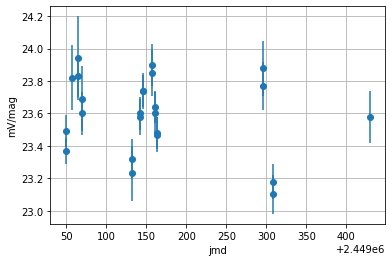

In [ ]:
mean_mV = np.mean(tbl1['V'])
print(f'mean mV={mean_mV:.2f}')

fig,ax = plt.subplots()
ax.errorbar(tbl1['Date'],tbl1['V'],yerr=tbl1['errV'],fmt='o')
ax.set(xlabel='jmd',ylabel='mV/mag')
plt.grid()
plt.show()

In [ ]:
from astropy.coordinates import Distance
import astropy.units as u

P = 100
Mv = -2.760 * (np.log10(P) - 1)-4.160
DM = mean_mV-Mv
dMpc = Distance(distmod=DM)
print(f'Mv={Mv:.2f}\nDM={DM:.2f}\nd ={dMpc.to(u.Mpc):.2f}')

Mv=-6.92
DM=30.52
d =12.71 Mpc


now with multiple cepheids

In [ ]:
tbl2 = ascii.read('https://www.lsw.uni-heidelberg.de/users/jheidt/praktikum/Astrolab_SS2020/Task10/Cosmology_tab2.txt',data_start=2)
#del tbl['V']
tbl2['name'] = [i+j for i,j in zip(tbl2['col1'],tbl2['col2'])]
tbl2.rename_columns([f'col{i}' for i in range(3,8)],['n','mu','errmu','v_Helio','v_CMB'])
del tbl2['col1']
del tbl2['col2']

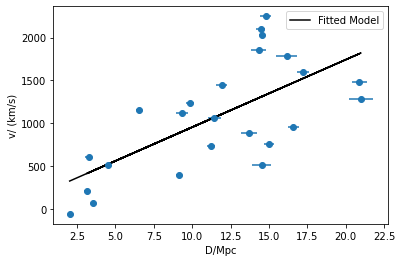

H0=78.72 km / (Mpc s)
T0=12.42 Gyr


In [ ]:
from astropy.modeling import models, fitting
from astropy.coordinates import Distance

# define a model for a line
line_orig = models.Linear1D(slope=1.0, intercept=0.5)

x = Distance(distmod=tbl2['mu']).value
xerr = Distance(distmod=tbl2['mu']+tbl2['errmu']).value - Distance(distmod=tbl2['mu']).value
y = tbl2['v_CMB']

# initialize a linear fitter
fit = fitting.LinearLSQFitter()

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter weights=1/yerr for yerr
fitted_line = fit(line_init, x,y)

# plot the model
fig,ax = plt.subplots()
ax.errorbar(x,y,xerr=xerr,fmt='o')
ax.plot(x, fitted_line(x), 'k-', label='Fitted Model')
plt.xlabel('D/Mpc')
plt.ylabel('v/ (km/s)')
plt.legend()
plt.show()

H0 = fitted_line.parameters[0] * u.km/u.s/u.Mpc
T0 = 1/H0.to(1/u.Gyr)
print(f'H0={H0:.2f}\nT0={T0:.2f}')

## Lab–Tasks III: Hubble Constant from Local Supernovae
1. Why are Supernovae of type II not suitable for cosmological standard
candles?
  * the progenitor of a type II SN is a large star. Because the size of the progenitor is no longer fixed like in the case of a type II SN, the luminosity is also arbitrary.
2. What is the difference in the spectra of Type I and Type II Supernovae?
  * Type I: no hydrogen (exploding White Dwarf, massive star that has lost its hydrogen envelope), Type II: strong hydrogen line, strong Helium line
3. What is the meaning of the K–Correction in Cosmology?
  * account for flux shifted out of filter due to redshift
4. Make a Hubble-Diagram with the data of Table 4 and Table 5: ($z, m^{eff}_B$ ), linear in $logz$ (in the range $0.01≤ z< 1.0$) and linear in the B–band magnitude $m_{eff}$
B . Discuss the error bars.
5. Use the classical Hubble–law
    $$ m(z) − M_B = 5 \log {\frac{d[z]}{[Mpc]}} + 25 $$
  with the distance
  $$ d[z] = \frac{c}{H0} z $$
Since Supernovae are standard candles, we may write
$$ m(z) = M + 5 \log z $$
with the constant $$ M = MB − 5 \log \frac{H0 [Mpc]}{c} + 25 $$

This represents a linear relation in the Hubble–diagram. Determine by
using the data for z ≤ 0.1 the constant M (called calibration constant).
What is your value for H0 according to your fit if the absolute magnitude
of a Supernova MB=-19.47±0.2?
(SN–calibration by Tammann 1999)
Estimate the error for your Hubble constant.
6. Discuss alternative methods to determine the Hubble constant.

In [ ]:
from astropy.io import ascii
from astropy.table import vstack

tbl3 = ascii.read('https://www.lsw.uni-heidelberg.de/users/jheidt/praktikum/Astrolab_SS2020/Task10/Cosmology_tab3.txt',data_start=2)
tbl3.rename_columns([f'col{i}' for i in range(1,10)],["SN",'z','sigma_z','m','sigma', "A_E", "K", "Delta", "sigma_B"])

tbl4 = ascii.read('https://www.lsw.uni-heidelberg.de/users/jheidt/praktikum/Astrolab_SS2020/Task10/Cosmology_tab4.txt',data_start=2)
tbl4.rename_columns([f'col{i}' for i in range(1,10)],["SN",'z','sigma_z','m','sigma', "A_E", "K", "Delta", "sigma_B"])

tbl3['meff'] = tbl3['m'] + tbl3['Delta'] - tbl3['K'] - tbl3['A_E']
tbl4['meff'] = tbl4['m'] + tbl4['Delta'] - tbl4['K'] - tbl4['A_E']

tbl5 = vstack([tbl3,tbl4])

* $\Delta_{corr}$: light curve correction
* $K$: K-correction
* $A_E$: galactic extinction

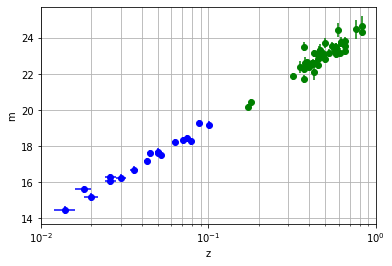

In [ ]:
# plot the model
fig,ax = plt.subplots()
ax.errorbar(tbl3['z'],tbl3['meff'],xerr=tbl3['sigma_z'],yerr=tbl3['sigma_B'],fmt='ob')
ax.errorbar(tbl4['z'],tbl4['meff'],xerr=tbl4['sigma_z'],yerr=tbl4['sigma_B'],fmt='og')
ax.set(xlabel='z',ylabel='m',xscale='log',xlim=[1e-2,1])
ax.grid(True, which = "both")
plt.show()

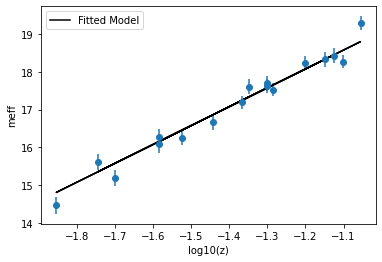

In [ ]:
from astropy.modeling import models, fitting

x = np.log10(tbl5['z'][tbl5['z']<0.1])
y = tbl5['meff'][tbl5['z']<0.1]
yerr = tbl5['sigma_B'][tbl5['z']<0.1]

# initialize a linear fitter
fit = fitting.LinearLSQFitter()

# initialize a linear model
line_init = models.Linear1D(slope=5)
line_init.slope.fixed = True

# fit the data with the fitter 
fitted_line = fit(line_init, x,y,weights=1/yerr)

# plot the model
fig,ax = plt.subplots()
ax.errorbar(x,y,yerr=yerr,fmt='o')
ax.plot(x, fitted_line(x), 'k-', label='Fitted Model')

'''
fitted_line.intercept=24.276
ax.plot(x, fitted_line(x), 'k-', label='Fitted Model')
fitted_line.intercept=23.876
ax.plot(x, fitted_line(x), 'k-', label='Fitted Model')
'''

plt.xlabel('log10(z)')
plt.ylabel('meff')
plt.legend()
plt.show()

$$H_0 = 10^{(M_B+25-\mathcal{M})/5} \cdot \frac{c}{Mpc}$$

$$\delta H_0 = \sqrt{ (\partial_{M_B} H_0 \cdot \delta M_B)^2 + (\partial_\mathcal{M} H_0 \cdot \delta \mathcal{M})^2} = \sqrt{ (H_0 \cdot \frac{\ln{10}}{5} \cdot \delta M_B)^2 + ( H_0 \cdot \frac{\ln{10}}{5} \cdot \delta \mathcal{M})^2} $$

In [ ]:
import astropy.constants as c
import astropy.units as u

M = fitted_line.parameters[1]
MB = -19.47
H0_func = lambda M: (10**((MB+25-M)/5)*c.c/u.Mpc).to(u.km/u.s/u.Mpc)

dMB = 0.2
dM  = 0.2
dH0 = np.sqrt((H0_func(M)*np.log(10)*dMB/5)**2 + (H0_func(M)*np.log(10)*dM/5)**2)

print(f'M={M:.2f}\nH0={H0_func(M):.2f}+-{dH0:.2f}')

M=24.08
H0=58.56 km / (Mpc s)+-7.63 km / (Mpc s)


### Measuring the Hubble constant

* from the distance ladder (HST-key project)
* from CMB fluctuations (Planck mission)
* Tulley Fisher relation -> large error


## Lab–Tasks IV: Extracting the best Cosmological model from your own Hubble diagram.
1. Calculate from the distance modulus $m^{eff}_B − MB$, the luminosity distance
$d_L$, for the Supernovae in Table 3 and 4. Plot this diagram with $d_L$ in
Gigaparsec as $x$–axis and $cz$ in units of km/sec as y–axis. Test the linearity
of the Hubble-relation for redshifts $z > 0.15$.
2. Show that for $z ≪ 1$,the Mattig–formula converges towards the Hubble–
law, independent of the deceleration parameter $q_0$. Notice that $q_0 < 1$.
3. Plot in your Hubble diagram theoretical curves for $Ω_Λ = 0$. Is this com-
patible with the data? consider in particular SCDM with
 $$ d_L(z,H_0) = \frac{2c}{H_0} (1+z-\sqrt{1+z})$$
4. Make a plot for the distance modulus DM as a function of the redshift
for the redshift range $0.01 < z < 5.0 (linear in redshift) for the following
models: deSitter, SCDM, and ΛCDM.

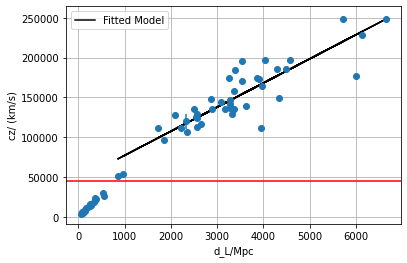

In [ ]:
from astropy.modeling import models, fitting
from astropy.coordinates import Distance

tbl5['mu'] = tbl5['meff']-MB
x = Distance(distmod = tbl5['mu']).to(u.Mpc).value
y = (tbl5['z']*c.c).to(u.km/u.s).value
yerr  = (tbl5['sigma_z']*c.c).to(u.km/u.s).value

# define a model for a line
line_orig = models.Linear1D(slope=1.0, intercept=0.5)

# initialize a linear fitter
fit = fitting.LinearLSQFitter()

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter weights=1/yerr for yerr
threshold = 0.15*c.c.to(u.km/u.s).value
fitted_line = fit(line_init, x[y > threshold],y[y> threshold])

# plot the model
fig,ax = plt.subplots()
ax.errorbar(x,y,yerr=yerr, fmt='o')
ax.plot(x[y > threshold], fitted_line(x[y > threshold]), 'k-', label='Fitted Model')
plt.xlabel('d_L/Mpc')
plt.ylabel('cz/ (km/s)')
plt.axhline(0.15*c.c.to(u.km/u.s).value, color = "r")
plt.grid()
plt.legend()
plt.show()

In [ ]:
def eta(z, Omega_M):
  s = (1/Omega_M - 1)**(1/3)
  a = 1+z
  res = 2*np.sqrt(s**3+1)*(a**4-0.1540 * s * a**3+0.4304 * s**2* a**2+0.19097 * s**3 * a + 0.066941 * s**4)**(-1/8)
  return res
def LCDM(z, Omega_M, H0):
  return (c.c/H0 * (1+z) * (eta(0, Omega_M) - eta(z, Omega_M))).to(u.Mpc)

def SCDM(z, Omega_M, H0):
  q0 = Omega_M/2
  return (c.c/H0 * (1/q0**2) * (q0 * z + (q0 - 1)*(np.sqrt(1+2*q0*z) - 1))).to(u.Mpc)

def deSitter(z, H0):
  return (c.c/H0 * z * (1+z)).to(u.Mpc)

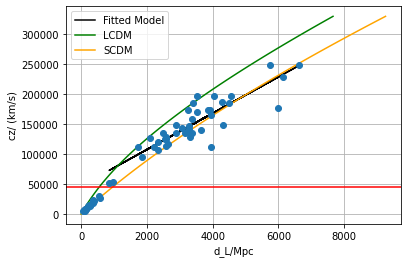

In [ ]:
from astropy.modeling import models, fitting
from astropy.coordinates import Distance

tbl5['mu'] = tbl5['meff']-MB
x = Distance(distmod = tbl5['mu']).to(u.Mpc).value
y = (tbl5['z']*c.c).to(u.km/u.s).value

# define a model for a line
line_orig = models.Linear1D(slope=1.0, intercept=0.5)

# initialize a linear fitter
fit = fitting.LinearLSQFitter()

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter weights=1/yerr for yerr
threshold = 0.15*c.c.to(u.km/u.s).value
fitted_line = fit(line_init, x[y > threshold],y[y> threshold])

H0 = 50*u.km/u.s/u.Mpc
Omega_M = 0.3
z = np.linspace(0,1.1)
D_LCDM = LCDM(z,Omega_M,H0)
D_SCDM = SCDM(z,Omega_M,H0)


# plot the model
fig,ax = plt.subplots()
ax.errorbar(x,y,fmt='o')
ax.plot(x[y > threshold], fitted_line(x[y > threshold]), 'k-', label='Fitted Model')
ax.plot(D_LCDM,(z*c.c).to(u.km/u.s),color='green',label='LCDM')
ax.plot(D_SCDM,(z*c.c).to(u.km/u.s),color='orange',label='SCDM')


plt.xlabel('d_L/Mpc')
plt.ylabel('cz/ (km/s)')
plt.axhline(0.15*c.c.to(u.km/u.s).value, color = "r")
plt.grid()
plt.legend()
plt.show()

In [ ]:
(1 +/- x)^{1/2} ~ (1 +/- x/2) für x << 1
für 2*q0*z << 1 anwenden
und d_L darüber nähern
-> d_L ~ c/H0 *z


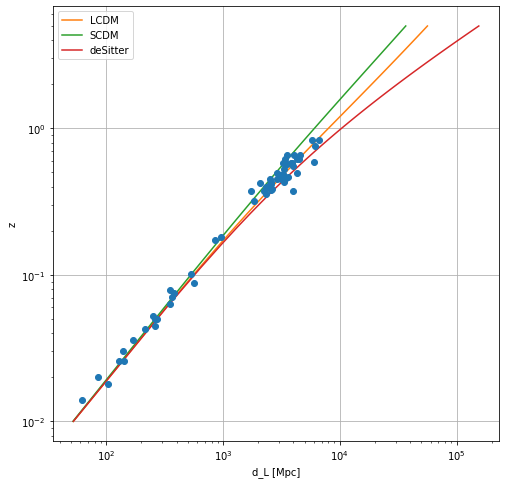

In [ ]:
z = np.linspace(0.01, 5.0, 100)
plt.figure(figsize = (8, 8))
plt.errorbar(x, tbl5['z'],fmt='o')
plt.plot(LCDM(z, 0.3, H0),z, label = "LCDM")
plt.plot(SCDM(z, 1, H0),z, label = "SCDM")
plt.plot(deSitter(z, H0),z, label = "deSitter")
plt.grid()
plt.ylabel("z")
plt.xlabel("d_L [Mpc]")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

## Lab–Tasks V: From the plot for the Fundamental Plane of Cosmology

give the positions and discuss the following models:
1. A flat model with $Ω_k = 0$.
2. The transition from decelerated to accelerated models, i.e. $q_0 = 0$.
    $$q_0 = \Omega_M/2 - \Omega_\Lambda = 0$$
3. Constrains from the Supernova projects.
4. Constrains from mass/luminosity observations in galaxy clusters.
5. Constrains from observations of the Cosmic Microwave Background (CMB)
from the Cosmic Background Explorer (COBE) and the Balloon Observations Of Millimetric Extragalactic Radiation and Geophysics (BOOMERang).
6. Constrains from observations of the CMB from the Wilkinson Microwave
Anisotropy Probe (WMAP).
7. Constrains from observations of the CMB from Planck Space Observatory.
8. How would you determine lines of constant ages on this plane?

![FundmPlane](https://www.researchgate.net/profile/Juan_Garcia-Bellido/publication/1805222/figure/fig18/AS:394729960296457@1471122364576/The-OM-OL-plane-with-the-present-data-set-of-cosmological-observations-the.png)

![age](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/Age_Universe_Planck_2013.png/800px-Age_Universe_Planck_2013.png)



In [ ]:
H0 = 70 * u.km/u.s/u.Mpc
(1/H0).to(u.Gyr)*0.667

<Quantity 9.31696303 Gyr>